In [139]:
import numpy as np
import matplotlib.pyplot as plt
from character_engine.player_character import npc
from scipy.spatial import Voronoi, voronoi_plot_2d,  cKDTree
import random


class map():

    def __init__(self, name="Map", size=1024):
        self.name = name
        self.size = int(size**0.5)
        self.coord = np.zeros((self.size,self.size),dtype="int")

        self.location_coordinates = {}
        self.location_events = {}
        self.vors = {}

        self.interactions = {}
         

    def place_character(self):
        return [random.uniform(0.1,float(self.size)) for i in range(2)]

    def populate_map(self, n_locations=10, name="Regions", is_event=False, plot = False):

        centroids = [tuple([random.uniform(0.1,float(self.size)) for i in range(2)]) for i in range(n_locations)]

        centroids_rounded = [[float(format(centroid[0], '.2f')),float(format(centroid[1], '.2f'))] for centroid in centroids]

        vor = Voronoi(centroids_rounded)

        if not plot:
            fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='black',line_width=0.5, line_alpha=0.6, point_size=1)
            fig.set_size_inches(18.5, 10.5)

            for region in vor.regions:

                if not -1 in region:
                    polygon = [vor.vertices[i] for i in region]
                    plt.fill(*zip(*polygon),alpha=0.4)
                    plt.xlim(right=0, left=self.size)
                    plt.ylim(bottom=0, top=self.size)

        self.vors[name] = vor

        self.location_coordinates[name] = vor.points

        self.location_events[name] = is_event

        return vor

    def event_starter(self, event, player):

        location = player.location

        if event == "ambush":

            goblin = npc("Grognag",self,xp=20,p_health=15)

            player.battle(goblin, "Goblin Ambush")


    def check_region(self,coordinates):
        
        points = self.vor.points

        voronoi_kdtree = cKDTree(points)

        dst, regions = voronoi_kdtree.query(coordinates)
        
        return regions

    def create_regions(self, name, potential_regions,region_weights = np.nan, plot=False):

        if region_weights != region_weights:
        
            region_weights = [(1/len(potential_regions)) for i in range(len(potential_regions))]
        
        types = {}
                
        for i in range(0,len(self.vors[name].regions)):    

            types[str(self.vors[name].regions[i])] = (random.choices(list(potential_regions.keys()), weights =region_weights,k=1))[0]

        if not plot:
        
            fig = voronoi_plot_2d(self.vors[name], show_vertices=False, line_colors='white',line_width=0.0, line_alpha=0.0, point_size=1)
            fig.set_size_inches(18.5, 10.5)

        if not plot:
        
            for region in self.vors[name].regions:
                
                if not -1 in region:
                
                    polygon = [self.vors[name].vertices[i] for i in region]
    
                    plt.fill(*zip(*polygon),color=potential_regions[types[str(region)]],alpha=0.4)
    
                plt.xlim(right=0, left=self.size)
                plt.ylim(bottom=0, top=self.size)

        regions = {}
        
        for region in map.vors["terrain"].regions:

            neighbor_list = []
        
            for pot_neighbor in map.vors["terrain"].regions:
            
                if len(np.intersect1d(map.vors["terrain"].vertices[region], map.vors["terrain"].vertices[pot_neighbor])) >= 2:
                
                    neighbor_list.append(pot_neighbor)
        
            regions[str(region)] = neighbor_list


        return types
        

In [140]:
map = map(name="Gothenburg")

{'[]': 'Mountains',
 '[5, 3, 2, 4]': 'Mountains',
 '[4, -1, 0, 2]': 'Mountains',
 '[5, 1, -1, 4]': 'Mountains',
 '[7, 1, 5, 3, 6]': 'Grassland',
 '[8, -1, 1, 7]': 'Grassland',
 '[12, 10, 9, 11]': 'Mountains',
 '[10, 6, 3, 2, 0, 9]': 'Water',
 '[11, -1, 0, 9]': 'Mountains',
 '[12, 8, 7, 6, 10]': 'Water',
 '[12, 8, -1, 11]': 'Water'}

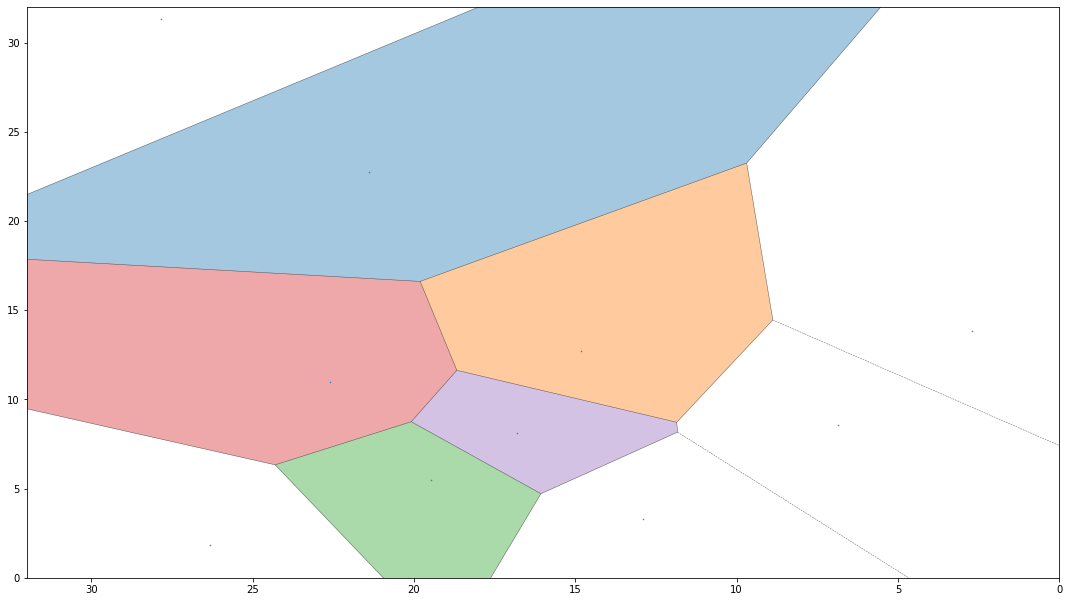

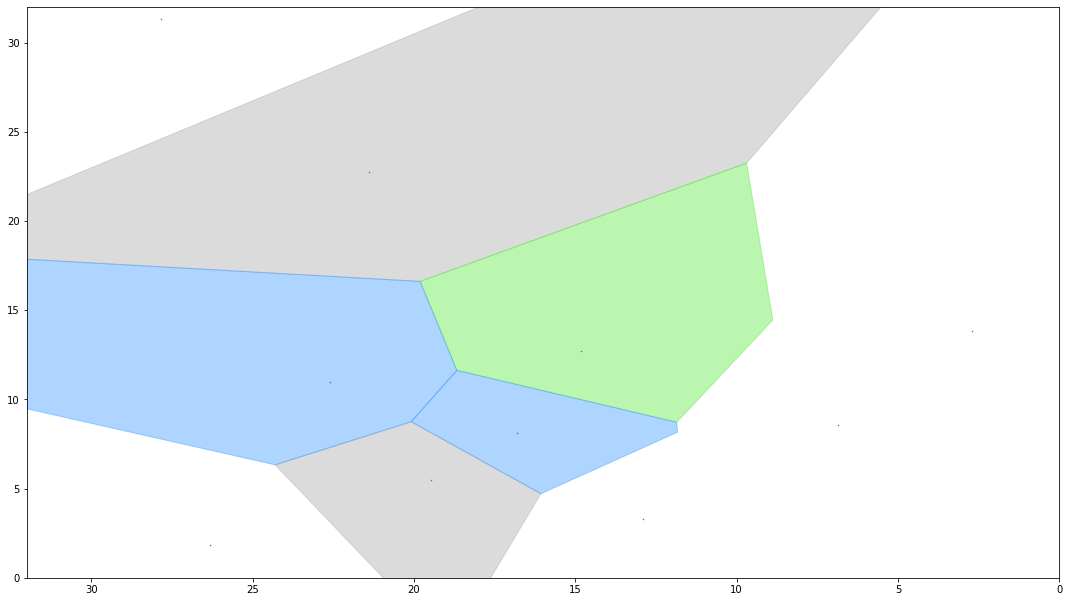

In [142]:
map.populate_map(10, name="terrain")

possible_terrains = {"Water":"#3396ff","Mountains":"#a7a7a7","Grassland":"#53e939"}

map.create_regions("terrain", possible_terrains)

In [175]:
map.vors["terrain"].vertices[map.vors["terrain"].regions[0]]

array([], shape=(0, 2), dtype=float64)

In [176]:
map.vors["terrain"].vertices[map.vors["terrain"].regions[1]]

array([[ 9.6897749 , 23.24970296],
       [19.81073627, 16.61698502],
       [36.25526211, 18.29214894],
       [-1.39229021, 46.56068357]])

In [159]:
c = map.vors["terrain"].vertices[map.vors["terrain"].regions[2]]

In [162]:
len(np.intersect1d(c,b))/2

2.0

In [173]:


regions = {}

for region in map.vors["terrain"].regions:

    neighbor_list = []

    for pot_neighbor in map.vors["terrain"].regions:

        if len(np.intersect1d(map.vors["terrain"].vertices[region], map.vors["terrain"].vertices[pot_neighbor])) >= 2:

            neighbor_list.append(pot_neighbor)

    regions[str(region)] = neighbor_list



In [180]:
regions[str(map.vors["terrain"].vertices[map.vors["terrain"].regions[1]])]

KeyError: '[[ 9.6897749  23.24970296]\n [19.81073627 16.61698502]\n [36.25526211 18.29214894]\n [-1.39229021 46.56068357]]'